In [1]:
!which python

/home/utente/bahamas_test/bin/python


In [2]:
!pip show bahamas

Name: bahamas
Version: 0.1.0
Summary: BAyesian HAmiltonian Montecarlo Analysis for Stochastic gravitational wave signal
Home-page: UNKNOWN
Author: Federico Pozzoli
Author-email: fpozzoli@uninsubria.it
License: UNKNOWN
Location: /home/utente/bahamas
Requires: h5py, jax, jaxlib, matplotlib, nessai, numpy, numpyro, pyyaml, scipy
Required-by: 


In [3]:
import sys
print(sys.executable)

/home/utente/bahamas_test/bin/python


In [4]:
import yaml 
import corner
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [5]:
import bahamas.psd_response.modulation as mod
import bahamas.psd_response.average_envelope as mod_av

In [6]:
s1 = 0.04
s2 = 0.14
sinpsi = -0.99
sinLat = -0.09
Long = -1.62

In [7]:
year = 31557600.0
dt = 5
t = np.arange(0, year, dt)

nchunk = 26
t_chunk = np.linspace(0, year, nchunk)
t1 = t_chunk[:-1]
t2 = t_chunk[1:]

In [8]:
A, E = mod.envelopes_gaussian(EclipticLatitude=sinLat, EclipticLongitude=Long, sinPsi=sinpsi,
                             Sigma1 = s1, Sigma2 = s2, t = t, LISA_Orbital_Freq=1 / year)

In [9]:
A_av = mod_av.average_envelopes_gaussian(SinEclipticLatitude=sinLat, EclipticLongitude=Long, sinPsi=sinpsi,
                             Sigma1 = s1, Sigma2 = s2, t1 = t1, t2 = t2, LISA_Orbital_Freq=1 / year)

#inside the likelihood we need the average of squared amplitude since we are modeling the spectrum
#here we take instead the amplitude
A_av = A_av ** 0.5

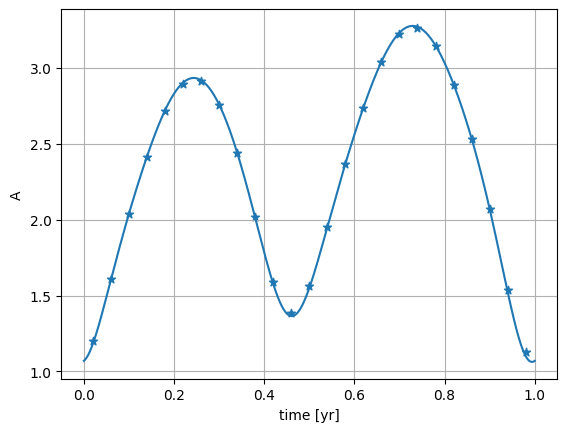

In [10]:
plt.plot(t / year, A)
plt.scatter(0.5 * (t1 + t2) / year, A_av, marker = '*')
plt.xlabel('time [yr]')
plt.ylabel('A')
plt.grid()